In [1]:
# Importing Necesssary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
# Loading the Dataset
dataset = pd.read_csv('/content/Steering Angle Prediction Dataset.csv')

In [3]:
# Dataset Shape
dataset.shape

(9971, 2)

In [4]:
# Dataset structure 
dataset.describe()

,Turn Radius,Steering Angle
count,9971.00000,9971.000000
mean,501.50000,1.943714
std,287.85241,1.278615
min,3.00000,1.089000
25%,252.25000,1.466000
50%,501.50000,1.756000
75%,750.75000,2.023000
max,1000.00000,23.000000


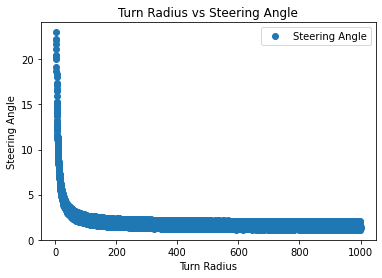

In [5]:
# Dataset Plot
dataset.plot(x='Turn Radius', y='Steering Angle', style='o')  
plt.title('Turn Radius vs Steering Angle')  
plt.xlabel('Turn Radius')  
plt.ylabel('Steering Angle')  
plt.show()

In [6]:
x = dataset['Turn Radius'].values.reshape(-1,1)
y = dataset['Steering Angle'].values.reshape(-1,1)

In [7]:
# Performing Linear Regression and Training
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y_pred=lm.predict(x.reshape(-1,1))

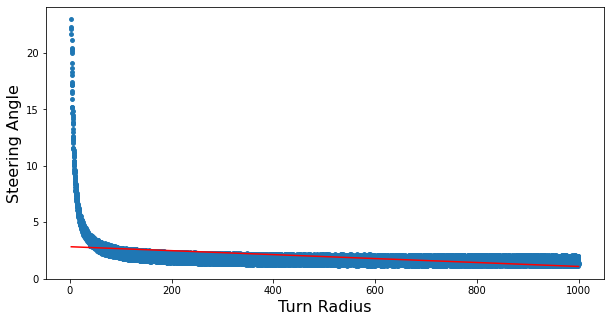

In [9]:
# plotting predictions
plt.figure(figsize=(10,5))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.xlabel('Turn Radius',fontsize=16)
plt.ylabel('Steering Angle',fontsize=16)
plt.show()

In [10]:
# Root Mean Square Error for Linear Regression
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,y_pred)))

RMSE for Linear Regression=> 1.1750112060119176


In [11]:
# Polynomial Regression and Training
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x.reshape(-1,1),y.reshape(-1,1))

Pipeline(memory=None,
         steps=[('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('modal',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

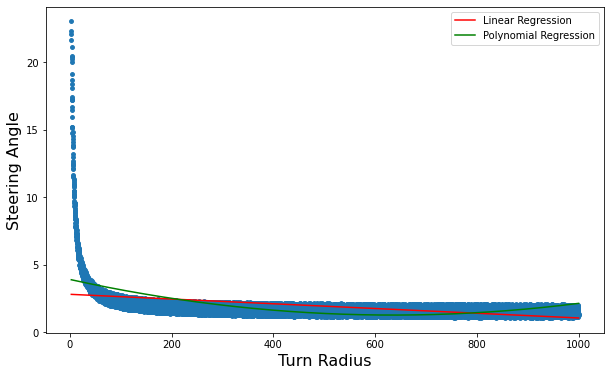

In [12]:
# Plotting Linear vs Polynomial Regression
poly_pred=pipe.predict(x.reshape(-1,1))
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Turn Radius',fontsize=16)
plt.ylabel('Steering Angle',fontsize=16)
plt.legend()
plt.show()

In [13]:
#RSME for Polynomial Regression
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

RMSE for Polynomial Regression=> 1.0709263902882893
